MEter la pajaa

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [64]:
complejo="CELAYA" #poner el complejo que desea analizar (CELAYA, RAMO Y SALTILLO)

deacerodb=pd.read_csv("C:\\Users\\ilopezg\Documents\Curso python\Proyecto final\\DB P&L.csv")
deacerodb.head()

,Fecha,Hora,PML MDA CELAYA,PML MTR CELAYA,PML MDA RAMOS,PML MTR RAMOS,PML MDA SALTILLO,PML MTR SALTILLO,NOM CELAYA,CON CELAYA,NOM RAMOS,CON RAMOS,NOM SALTILLO,CON SALTILLO
0,2022-08-01,1,1460.96,1378.46,1490.66,1367.28,1495.11,1372.00,171.309,156.854812,97.5,95.08626,11.75,9.632
1,2022-08-01,2,1446.18,1408.64,1462.27,1389.57,1466.64,1393.67,169.136,154.865984,96.1,94.50300,11.74,9.310
2,2022-08-01,3,1432.84,1403.85,1439.35,1378.53,1443.95,1383.43,147.264,166.788880,96.2,107.43032,11.86,9.084
3,2022-08-01,4,1432.31,1387.27,1435.52,1363.78,1441.11,1369.52,146.695,149.726676,94.3,114.65114,11.49,9.277
4,2022-08-01,5,1426.85,1355.97,1428.72,1337.19,1435.12,1343.72,143.895,151.159842,94.0,84.71968,11.78,9.287


In [67]:
# Consolidacion de columnas de fecha y hora como indice de DataFrames
deacerodb.index
#deacerodb_datestr=deacerodb[['Fecha','Hora']]
#deacerodb_datetime=pd.DataFrame({'Fecha': deacerodb.Fecha+pd.to_timedelta(deacerodb.Hora,unit='h')})
#deacerodb_pml=deacerodb
#deacerodb_pml['Fecha']=deacerodb_datetime['Fecha']
#deacerodb_pml.set_index('Fecha',inplace=True)
deacerodb.head()
#deacerodb.index()

,Fecha,Hora,PML MDA CELAYA,PML MTR CELAYA,PML MDA RAMOS,PML MTR RAMOS,PML MDA SALTILLO,PML MTR SALTILLO,NOM CELAYA,CON CELAYA,NOM RAMOS,CON RAMOS,NOM SALTILLO,CON SALTILLO
0,2022-08-01,1,1460.96,1378.46,1490.66,1367.28,1495.11,1372.00,171.309,156.854812,97.5,95.08626,11.75,9.632
1,2022-08-01,2,1446.18,1408.64,1462.27,1389.57,1466.64,1393.67,169.136,154.865984,96.1,94.50300,11.74,9.310
2,2022-08-01,3,1432.84,1403.85,1439.35,1378.53,1443.95,1383.43,147.264,166.788880,96.2,107.43032,11.86,9.084
3,2022-08-01,4,1432.31,1387.27,1435.52,1363.78,1441.11,1369.52,146.695,149.726676,94.3,114.65114,11.49,9.277
4,2022-08-01,5,1426.85,1355.97,1428.72,1337.19,1435.12,1343.72,143.895,151.159842,94.0,84.71968,11.78,9.287


In [48]:
#deacerodb.dtypes #se obtiene que tipos de tadatos tenemos

In [26]:
#deacerodb['Fecha']=pd.to_datetime(deacerodb['Fecha']) #cambiamos el tipo de dato de la Fecha a tipo de fecha para poder agrupar los datos por mes, etc.
#deacerodb.dtypes

In [61]:
deacerodb["2022-08-05":"2022-08-20"]

TypeError: cannot do slice indexing on RangeIndex with these indexers [2022-08-05] of type str

In [56]:
#deacerodb["Mes"]=pd.DatetimeIndex(deacerodb["Fecha"]).month #se agrega la columna del mes
#deacerodb["Año"]=pd.DatetimeIndex(deacerodb["Fecha"]).year #se agrega la columna del año
#deacerodb["Dia"]=pd.DatetimeIndex(deacerodb["Fecha"]).weekday #se agrega la columna del día de la semana(0=lunes...6=domingo) esto para los heatmaps.

coldart=deacerodb.corr() 
deacerodb["DART "+complejo]=deacerodb["PML MDA "+complejo]- deacerodb["PML MTR "+complejo]#se agrega la columna del DART
deacerodb["P&L " +complejo]=(deacerodb["NOM "+complejo]- deacerodb["CON "+complejo])*deacerodb["DART "+complejo]#se agrega la columna del P&L
deacerodb.head()

,Fecha,Hora,PML MDA CELAYA,PML MTR CELAYA,PML MDA RAMOS,PML MTR RAMOS,PML MDA SALTILLO,PML MTR SALTILLO,NOM CELAYA,CON CELAYA,NOM RAMOS,CON RAMOS,NOM SALTILLO,CON SALTILLO,DART CELAYA,P&L CELAYA
0,2022-08-01,1,1460.96,1378.46,1490.66,1367.28,1495.11,1372.00,171.309,156.854812,97.5,95.08626,11.75,9.632,82.50,1192.470485
1,2022-08-01,2,1446.18,1408.64,1462.27,1389.57,1466.64,1393.67,169.136,154.865984,96.1,94.50300,11.74,9.310,37.54,535.696404
2,2022-08-01,3,1432.84,1403.85,1439.35,1378.53,1443.95,1383.43,147.264,166.788880,96.2,107.43032,11.86,9.084,28.99,-566.026268
3,2022-08-01,4,1432.31,1387.27,1435.52,1363.78,1441.11,1369.52,146.695,149.726676,94.3,114.65114,11.49,9.277,45.04,-136.546687
4,2022-08-01,5,1426.85,1355.97,1428.72,1337.19,1435.12,1343.72,143.895,151.159842,94.0,84.71968,11.78,9.287,70.88,-514.931973


In [6]:
#deacerodb=deacerodb.set_index('Fecha') #Se deja el indice en relación a la fecha
#deacerodb.head(3)

In [57]:
celaya=deacerodb[['Fecha','Hora','PML MDA '+complejo,'PML MTR '+complejo,'NOM '+complejo,'CON '+complejo,'P&L '+complejo,'DART '+complejo]] #se filtra solo la información del complejo
celaya.head()

,Fecha,Hora,PML MDA CELAYA,PML MTR CELAYA,NOM CELAYA,CON CELAYA,P&L CELAYA,DART CELAYA
0,2022-08-01,1,1460.96,1378.46,171.309,156.854812,1192.470485,82.50
1,2022-08-01,2,1446.18,1408.64,169.136,154.865984,535.696404,37.54
2,2022-08-01,3,1432.84,1403.85,147.264,166.788880,-566.026268,28.99
3,2022-08-01,4,1432.31,1387.27,146.695,149.726676,-136.546687,45.04
4,2022-08-01,5,1426.85,1355.97,143.895,151.159842,-514.931973,70.88


In [53]:
celaya["2022-08-05":"2022-08-20"]
#celaya8=celaya[deacerodb["Mes"]==8]
#celaya8.head()
#celaya.plot(color=colors,figsize=(10,5))

TypeError: cannot do slice indexing on RangeIndex with these indexers [2022-08-05] of type str

In [39]:
celaya["P&L "+complejo].sum() #se obtiene el DART total del periodo seleccionado, ver si agregamos la columna de los P&L en python o la agregamos desde el excel
#print("Eld DART de CELAYA para el mes de agosto fue de:", celaya8)

-222721.20030462797

Text(0, 0.5, 'MW')

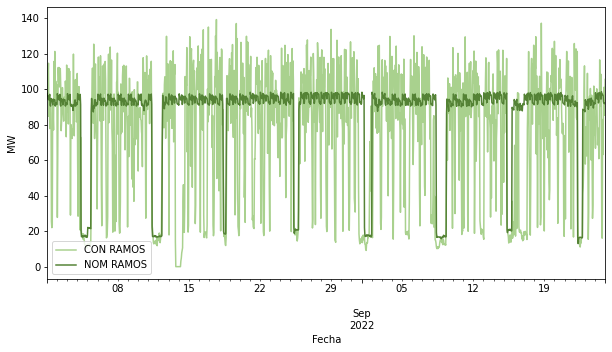

In [45]:
colors=['#A9D18E','#548235']
celayanc=deacerodb[['CON '+complejo,'NOM '+complejo]] #se filtra solo la información de CELAYA de nominación y consumo
celayanc.plot(color=colors,figsize=(10,5))
plt.legend(loc=3, fontsize = 10)#poisición de las etiquetas
plt.xlabel("Fecha")
plt.ylabel("MW")